# Однофакторный анализ связи меток кред и фрод дефолта target.class с данными таблиц Фед ресурса efrsfdu базы данных VLS-MDM-DB MDM_Main по фичам (часть 4)

- 'contract_date_delta_first' - разница в днях между самым первым заключенным договором в mdm до даты принятия решения 
- 'contract_date_delta_last' -  разница в днях между последним заключенным договором в mdm до даты принятия решения 
- 'end_date_last' -  разница в днях между датой самого последнего завершения в mdm до даты принятия решения
- 'end_date_first' - разница в днях между датой самого первого завершения в mdm до даты принятия решения 

Входные данные data/interm/target_features.pkl из feature_engineering.ipynb уже рассчитанные фичи

In [1]:
import pandas as pd

In [2]:
pre = '../../' # путь до главной директории проекта

%run ../init.ipynb #подгрузить нужные библиотеки
%run ../params.ipynb #параметры как логин пароль к БИ, параметры расчёта ( в нашем случае их нет)
%run ../init_mdm.ipynb
%run ../preprocessing/preprocessing_target.ipynb
%run ../ML_functions.ipynb
%run ../auxiliary/plots.ipynb

In [3]:
name = pre + "data/interm/target_features.pkl"
target_features = pd.read_pickle(name, compression={'method':'zip'})

print("Размер считанных данных target_class with mdm features- {}".format(target_features.shape))

Размер считанных данных target_class with mdm features- (85798, 39)


In [4]:
# сюда таблицы будем кидать, для отчетов
name = pre + "data/interm/auxilary/analysis_features_part4.xlsx"
writer = ExcelWriter(name)

In [5]:
# target_features.head(2)

#### Теперь формируем выборки для фрод и кред дефолта

In [6]:
target_frod = Target(type='фрод', target_data=target_features) # это фрод дефолт, макс по обращению
target_frod_early = Target(type='фрод', target_data=target_features, by_application=False) # это приведенный фрод дефолт на самый первое обращение
target_cred = Target(type='кред', target_data=target_features)# это кред дефолт, макс по обращению

target_frod.print_param()
target_frod_early.print_param()
target_cred.print_param()

target_frod.data = target_frod.data.reset_index()
target_cred.data = target_cred.data.reset_index()



Параметры обработанной таблицы портфеля рисков  по обращениям:
	фрод дефолт = 1  у выборки 4708 из 63131 (7.46%)

Параметры обработанной таблицы портфеля рисков  приведенный фрод дефолт на самое первое обращение:
	фрод дефолт = 1  у выборки 4179 из 61793 (6.76%)

Параметры обработанной таблицы портфеля рисков  по обращениям:
	кред дефолт = 1  у выборки 1977 из 43723 (4.52%)


In [7]:
# target_frod.data.head(2)

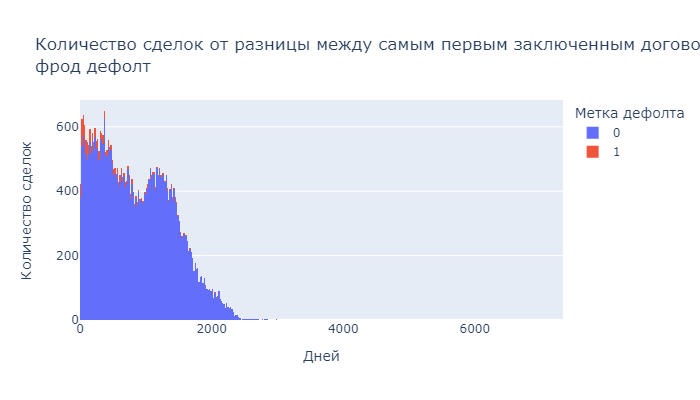

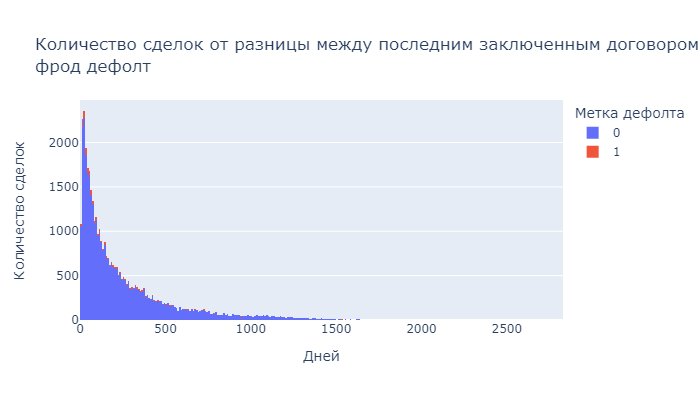

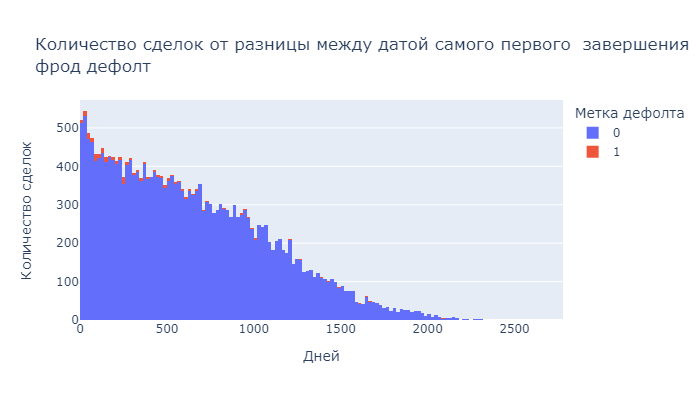

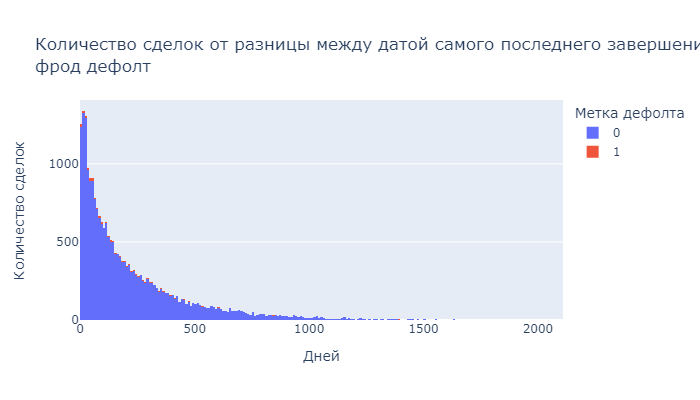

In [8]:
fig = show_duration(target_frod.data, x='contract_date_delta_first', title='Количество сделок от разницы между самым первым заключенным договором'+'<br>'+'фрод дефолт')
fig = show_duration(target_frod.data, x='contract_date_delta_last', title='Количество сделок от разницы между последним заключенным договором'+'<br>'+'фрод дефолт')
fig = show_duration(target_frod.data, x='end_date_first', title='Количество сделок от разницы между датой самого первого  завершения'+'<br>'+'фрод дефолт')
fig = show_duration(target_frod.data, x='end_date_last', title='Количество сделок от разницы между датой самого последнего завершения'+'<br>'+'фрод дефолт')

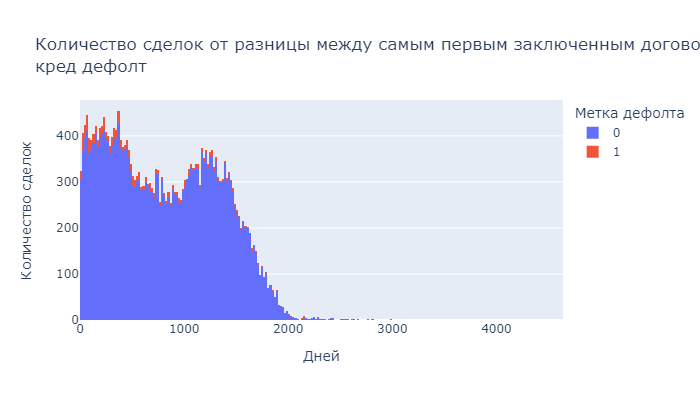

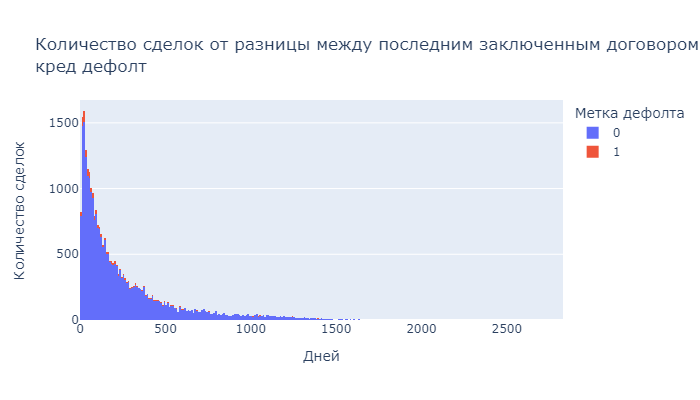

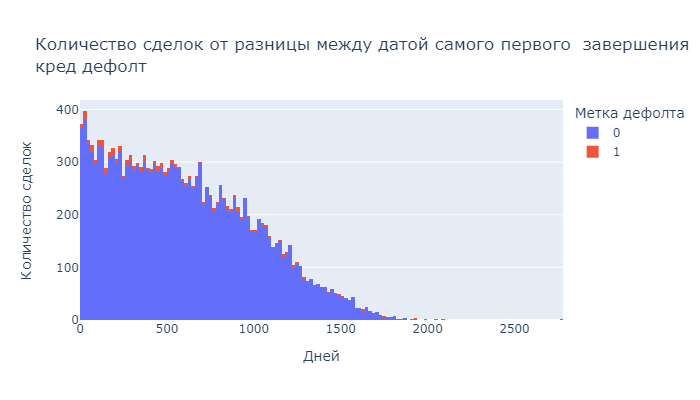

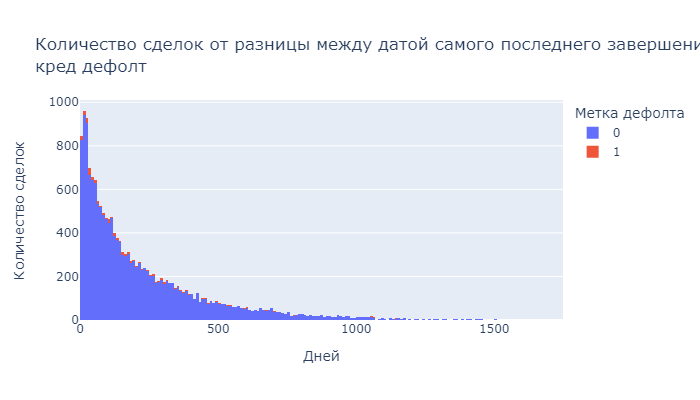

In [9]:
fig = show_duration(target_cred.data, x='contract_date_delta_first', title='Количество сделок от разницы между самым первым заключенным договором'+'<br>'+'кред дефолт')
fig = show_duration(target_cred.data, x='contract_date_delta_last', title='Количество сделок от разницы между последним заключенным договором'+'<br>'+'кред дефолт')
fig = show_duration(target_cred.data, x='end_date_first', title='Количество сделок от разницы между датой самого первого  завершения'+'<br>'+'кред дефолт')
fig = show_duration(target_cred.data, x='end_date_last', title='Количество сделок от разницы между датой самого последнего завершения'+'<br>'+'кред дефолт')

In [10]:
#  статиcтика по фичам
stat = target_frod.data['contract_date_delta_first'].apply(['min', 'max', 'mean', 'std']).to_frame().T.rename({'contract_date_delta_first':'frod_contract_date_delta_first'})
stat = stat.append(target_frod.data['contract_date_delta_last'].apply(['min', 'max', 'mean', 'std']).to_frame().T.rename({'contract_date_delta_last':'frod_contract_date_delta_last'}))
stat = stat.append(target_frod.data['end_date_first'].apply(['min', 'max', 'mean', 'std']).to_frame().T.rename({'end_date_first':'frod_end_date_first'}))
stat = stat.append(target_frod.data['end_date_last'].apply(['min', 'max', 'mean', 'std']).to_frame().T.rename({'end_date_last':'frod_end_date_last'}))

stat['min'] = stat['min'].apply(strfdelta, fmt='{D}days')
stat['max'] = stat['max'].apply(strfdelta, fmt='{Y} years  {D}days')
stat['mean'] = stat['mean'].apply(strfdelta, fmt='{Y} years  {D}days')
stat['std'] = stat['std'].apply(strfdelta, fmt='{Y} years  {D}days')

stat.to_excel(writer, sheet_name='stat_features')

stat

,min,max,mean,std
frod_contract_date_delta_first,2days,20 years 37days,2 years 115days,1 years 196days
frod_contract_date_delta_last,1days,7 years 272days,0 years 256days,0 years 294days
frod_end_date_first,0days,7 years 210days,1 years 273days,1 years 90days
frod_end_date_last,0days,5 years 282days,0 years 223days,0 years 247days


In [11]:
#  статиcтика по фичам
stat = target_cred.data['contract_date_delta_first'].apply(['min', 'max', 'mean', 'std']).to_frame().T.rename({'contract_date_delta_first':'frod_contract_date_delta_first'})
stat = stat.append(target_cred.data['contract_date_delta_last'].apply(['min', 'max', 'mean', 'std']).to_frame().T.rename({'contract_date_delta_last':'frod_contract_date_delta_last'}))
stat = stat.append(target_cred.data['end_date_first'].apply(['min', 'max', 'mean', 'std']).to_frame().T.rename({'end_date_first':'frod_end_date_first'}))
stat = stat.append(target_cred.data['end_date_last'].apply(['min', 'max', 'mean', 'std']).to_frame().T.rename({'end_date_last':'frod_end_date_last'}))

stat['min'] = stat['min'].apply(strfdelta, fmt='{D}days')
stat['max'] = stat['max'].apply(strfdelta, fmt='{Y} years  {D}days')
stat['mean'] = stat['mean'].apply(strfdelta, fmt='{Y} years  {D}days')
stat['std'] = stat['std'].apply(strfdelta, fmt='{Y} years  {D}days')

stat.to_excel(writer, sheet_name='stat_features_cred')

stat

,min,max,mean,std
frod_contract_date_delta_first,2days,12 years 253days,2 years 85days,1 years 156days
frod_contract_date_delta_last,1days,7 years 272days,0 years 257days,0 years 295days
frod_end_date_first,0days,7 years 210days,1 years 233days,1 years 39days
frod_end_date_last,0days,4 years 285days,0 years 224days,0 years 239days


## Logregression от разницы в днях между самым первым (последним) заключенным договором в mdm до даты принятия решения 

### Дефолтные сделки (фрод метка)

{'rocauc': 0.66, 'accuracy': 0.6, 'recall': 0.74}
{'intercept': -0.3176, 'coef': array([-0.8637])}


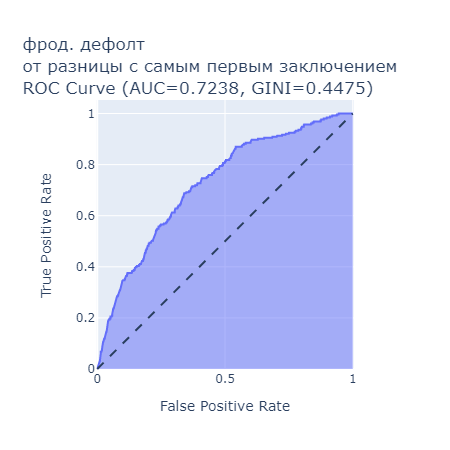

In [12]:
type = target_frod.type

df = target_frod.data[target_frod.data['contract_date_delta_first'].notnull()].copy()
df['delta_days'] = df['contract_date_delta_first'].dt.days

X_raw = np.asarray(df[['delta_days']])
y = np.asarray(df['Метка дефолта'])

log = LogReg(X_raw, y)

log.print_metrics()
log.print_coef()
fig = log.plot_roc_curve(title = '{}. дефолт'.format(type) + '<br>' +'от разницы c самым первым заключением')

{'rocauc': 0.5, 'accuracy': 0.36, 'recall': 0.66}
{'intercept': -0.0025, 'coef': array([-0.0723])}


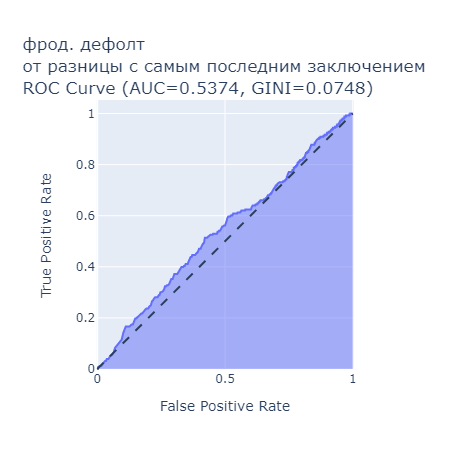

In [13]:
type = target_frod.type

df = target_frod.data[target_frod.data['contract_date_delta_last'].notnull()].copy()
df['delta_days'] = df['contract_date_delta_last'].dt.days

X_raw = np.asarray(df[['delta_days']])
y = np.asarray(df['Метка дефолта'])

log = LogReg(X_raw, y)

log.print_metrics()
log.print_coef()
fig = log.plot_roc_curve(title = '{}. дефолт'.format(type) + '<br>' +'от разницы c самым последним заключением')

### Дефолтные сделки (кред метка)

{'rocauc': 0.56, 'accuracy': 0.54, 'recall': 0.58}
{'intercept': -0.0766, 'coef': array([-0.401])}


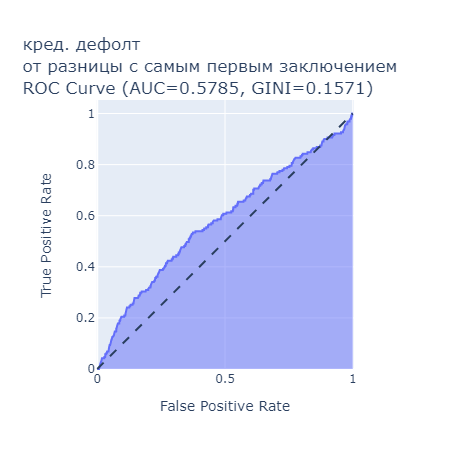

In [14]:
type = target_cred.type

df = target_cred.data[target_cred.data['contract_date_delta_first'].notnull()].copy()
df['delta_days'] = df['contract_date_delta_first'].dt.days

X_raw = np.asarray(df[['delta_days']])
y = np.asarray(df['Метка дефолта'])

log = LogReg(X_raw, y)

log.print_metrics()
log.print_coef()

fig = log.plot_roc_curve(title = '{}. дефолт'.format(type) + '<br>' +'от разницы c самым первым заключением')

{'rocauc': 0.49, 'accuracy': 0.37, 'recall': 0.61}
{'intercept': -0.0144, 'coef': array([-0.1815])}


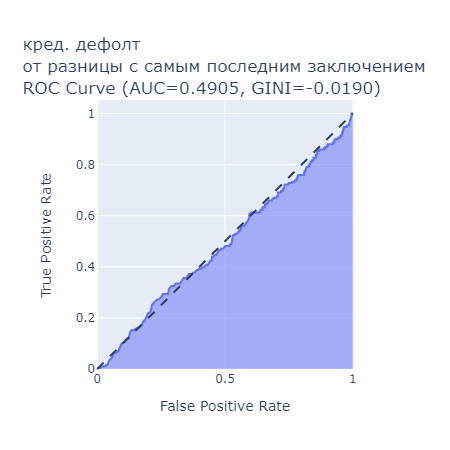

In [15]:
type = target_cred.type

df = target_cred.data[target_cred.data['contract_date_delta_last'].notnull()].copy()
df['delta_days'] = df['contract_date_delta_last'].dt.days

X_raw = np.asarray(df[['delta_days']])
y = np.asarray(df['Метка дефолта'])

log = LogReg(X_raw, y)

log.print_metrics()
log.print_coef()
fig = log.plot_roc_curve(title = '{}. дефолт'.format(type) + '<br>' +'от разницы c самым последним заключением')

## Logregression от разницы в днях между датой самого первого (последнего) завершения в mdm до даты принятия решения

### Дефолтные сделки (фрод метка)

{'rocauc': 0.64, 'accuracy': 0.53, 'recall': 0.75}
{'intercept': -0.134, 'coef': array([-0.5278])}


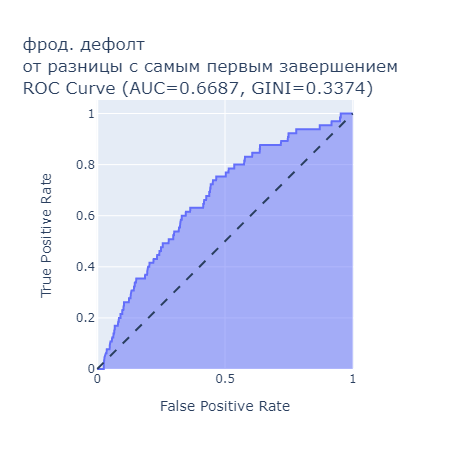

In [16]:
type = target_frod.type

df = target_frod.data[target_frod.data['end_date_first'].notnull()].copy()
df['delta_days'] = df['end_date_first'].dt.days

X_raw = np.asarray(df[['delta_days']])
y = np.asarray(df['Метка дефолта'])

log = LogReg(X_raw, y)

log.print_metrics()
log.print_coef()
fig = log.plot_roc_curve(title = '{}. дефолт'.format(type) + '<br>' +'от разницы c самым первым завершением')

{'rocauc': 0.52, 'accuracy': 0.35, 'recall': 0.69}
{'intercept': -0.0001, 'coef': array([-0.0156])}


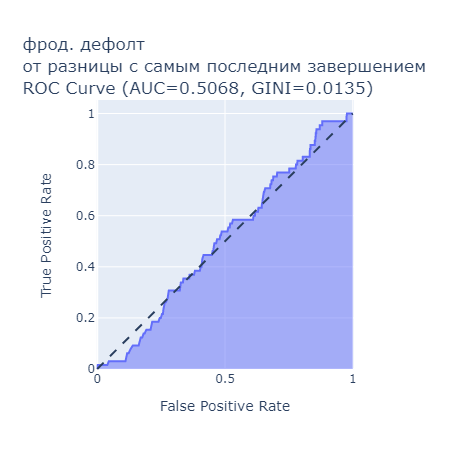

In [17]:
type = target_frod.type

df = target_frod.data[target_frod.data['end_date_last'].notnull()].copy()
df['delta_days'] = df['end_date_last'].dt.days

X_raw = np.asarray(df[['delta_days']])
y = np.asarray(df['Метка дефолта'])

log = LogReg(X_raw, y)

log.print_metrics()
log.print_coef()
fig = log.plot_roc_curve(title = '{}. дефолт'.format(type) + '<br>' +'от разницы c самым последним завершением')

### Дефолтные сделки (кред метка)

{'rocauc': 0.55, 'accuracy': 0.47, 'recall': 0.64}
{'intercept': -0.0006, 'coef': array([-0.0325])}


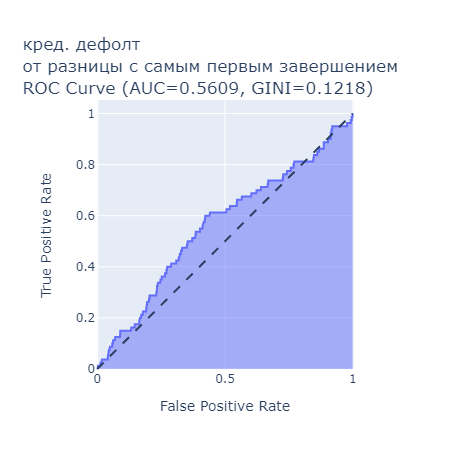

In [18]:
type = target_cred.type

df = target_cred.data[target_cred.data['end_date_first'].notnull()].copy()
df['delta_days'] = df['end_date_first'].dt.days

X_raw = np.asarray(df[['delta_days']])
y = np.asarray(df['Метка дефолта'])

log = LogReg(X_raw, y)

log.print_metrics()
log.print_coef()
fig = log.plot_roc_curve(title = '{}. дефолт'.format(type) + '<br>' +'от разницы c самым первым завершением')

{'rocauc': 0.54, 'accuracy': 0.65, 'recall': 0.41}
{'intercept': -0.0, 'coef': array([0.0014])}


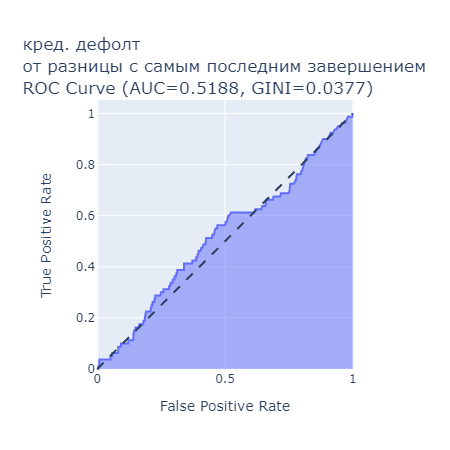

In [19]:
type = target_cred.type

df = target_cred.data[target_cred.data['end_date_last'].notnull()].copy()
df['delta_days'] = df['end_date_last'].dt.days

X_raw = np.asarray(df[['delta_days']])
y = np.asarray(df['Метка дефолта'])

log = LogReg(X_raw, y)

log.print_metrics()
log.print_coef()
fig = log.plot_roc_curve(title = '{}. дефолт'.format(type) + '<br>' +'от разницы c самым последним завершением')

In [20]:
# сохраняем tmp таблицы
if len(writer.sheets):
    writer.save()